In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments'

In [5]:
experiments_dict = {
    'maria': 'maria_v2', 
    'gt bass': 'gt_singer_bass_v0',
    'gt soprano': 'gt_singer_soprano_v0'
}

paths = [f'{root}/{exp}/metric_layers.csv' for exp in experiments_dict.values()]

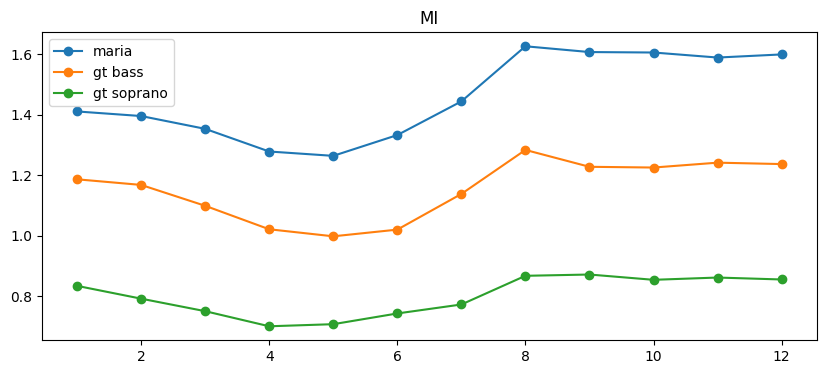

In [6]:
plt.figure(figsize=(10,4))

for exp in experiments_dict.keys():

    path = f'{root}/{experiments_dict[exp]}/metric_layers.csv'
    df = pd.read_csv(path, index_col=0)

    plt.plot(df['layer'], df['mi'], '-o', label = exp)

plt.title('MI')
plt.legend()

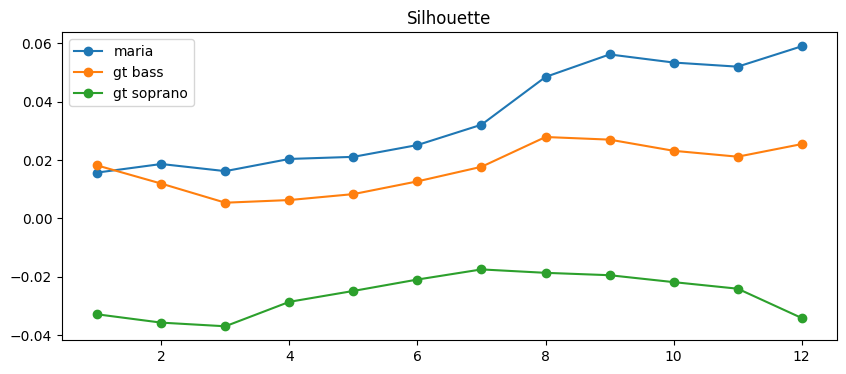

In [7]:
plt.figure(figsize=(10,4))

for exp in experiments_dict.keys():

    path = f'{root}/{experiments_dict[exp]}/metric_layers.csv'
    df = pd.read_csv(path, index_col=0)

    plt.plot(df['layer'], df['sil'], '-o', label = exp)

plt.title('Silhouette')
plt.legend()

# Dancers in layers

In [51]:
from phonetics import plots as plots

In [121]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments'
experiment_path = f'{root}/maria_v2/feat_2d'
feat_path_12 = f'{experiment_path}/feat_2d_layer_12.csv'

df_anotated_12 = pd.read_csv(feat_path_12, index_col=0)

mask = (df_anotated_12['phone_base'] != 'SP') & (df_anotated_12['phone_base'] != '3')

df_anotated_12 = df_anotated_12[mask]

unique_phones = [k for k in list(df_anotated_12['phone_base'].value_counts().keys())]

layers = [1, 4, 5, 8, 9, 12]

Making a 2d plot


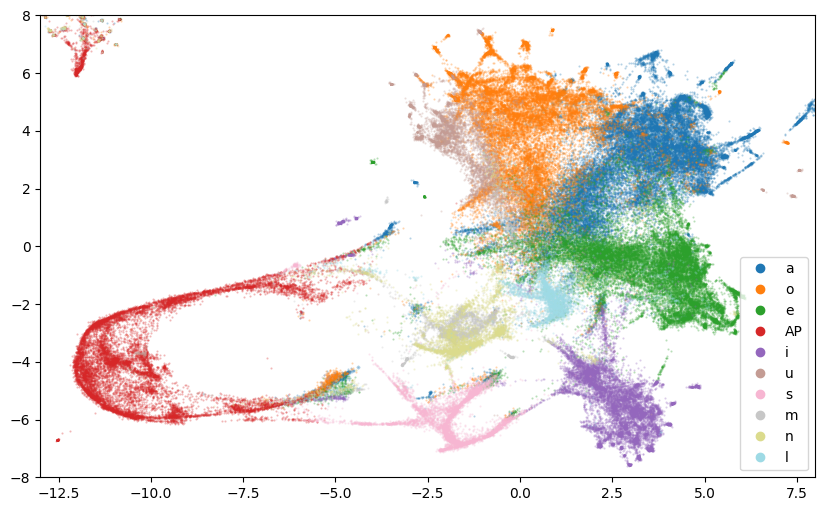

In [123]:
df = df_anotated_12.copy()

df['x'] = df['x'] - df['x'].mean()
df['y'] = df['y'] - df['y'].mean()

plots.make_tagged_LS_plot(df,
                    phones = unique_phones[:10],
                    figsize = (10, 6),
                    alpha = 0.3, 
                    s = 0.3, 
                    ylim=[-8,8],
                    xlim=[-13,8],
                    show_global = False,
                    add_legend = True,
                    label_detail = True,
                    save_fig = False,
                    ax = None);

Making a 2d plot
Making a 2d plot
Making a 2d plot
Making a 2d plot
Making a 2d plot
Making a 2d plot


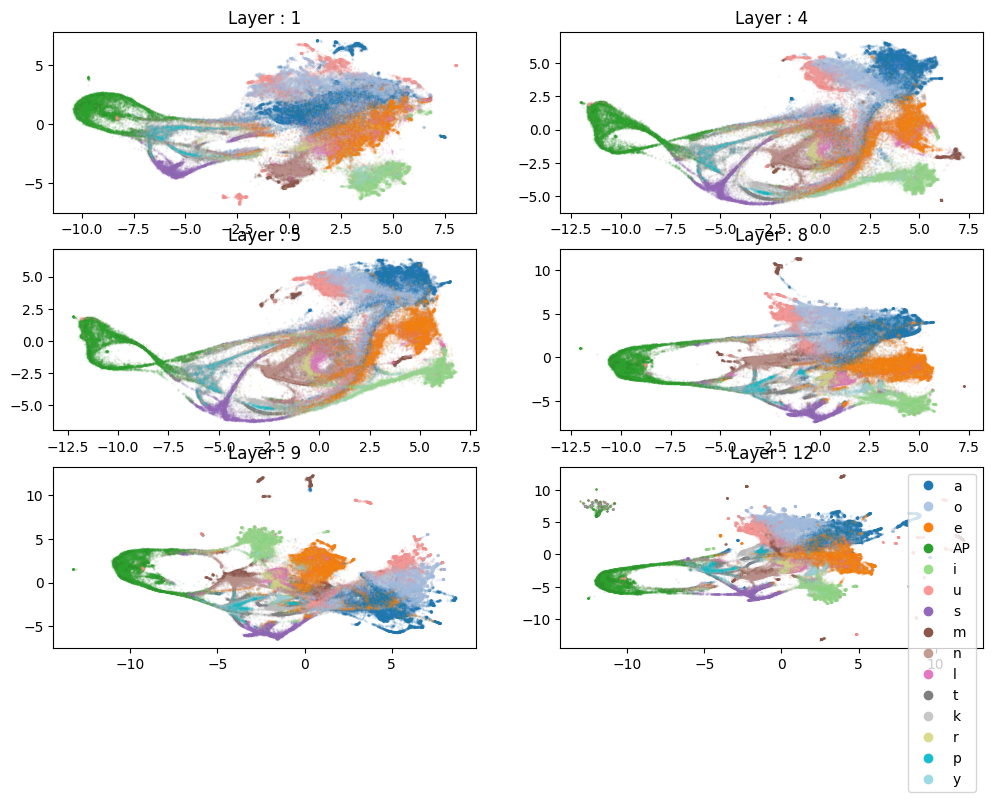

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [94]:
fig, axes = plt.subplots(3, 2, figsize = (12,8)) #, sharex=True, sharey=True)
axes = axes.flatten()

for ax, layer in zip(axes,layers):

    if layer == 12:
        add_legend = True
    else:
        add_legend = False

    feat_path = f'{experiment_path}/feat_2d_layer_{layer}.csv'
    df_anotated = pd.read_csv(feat_path, index_col=0)

    mask = (df_anotated['phone_base'] != 'SP') & (df_anotated['phone_base'] != '3')
    df = df_anotated[mask].copy()

    df['x'] = df['x'] - df['x'].mean()
    df['y'] = df['y'] - df['y'].mean()

    ax.set_title(f'Layer : {layer}')
    plots.make_tagged_LS_plot(df,
                    phones = unique_phones[:15],
                    figsize = (10, 6),
                    alpha = 0.1, 
                    s = 0.3, 
                    show_global = True,
                    add_legend = add_legend,
                    label_detail = True,
                    save_fig = False,
                    ax = ax);
    
plt.tight_layout();

In [125]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments'
experiment_path = f'{root}/gt_singer_bass_v0/feat_2d'
feat_path_12 = f'{experiment_path}/feat_2d_layer_12.csv'

df_anotated_12 = pd.read_csv(feat_path_12, index_col=0)

layers = [1, 4, 5, 8, 9, 12]
unique_phones = [k for k in list(df_anotated_12['phone_base'].value_counts().keys()) if k!= '<SP>']

Making a 2d plot


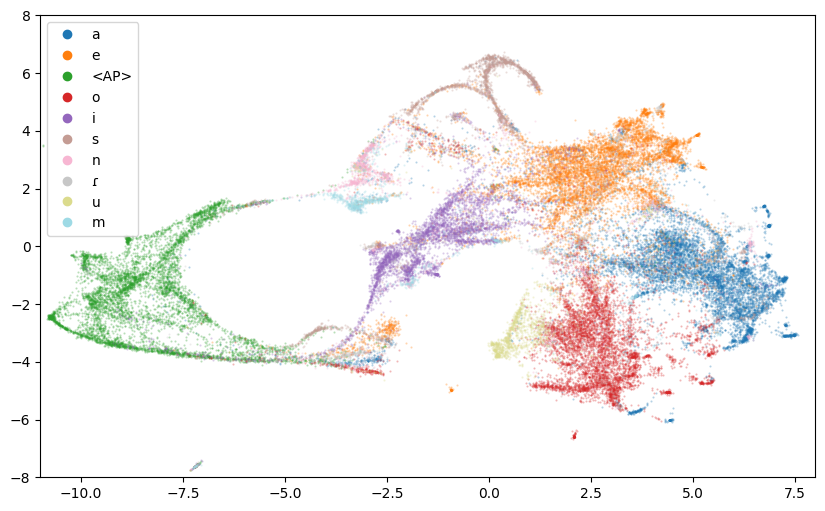

In [127]:
df = df_anotated_12.copy()

df['x'] = df['x'] - df['x'].mean()
df['y'] = df['y'] - df['y'].mean()

plots.make_tagged_LS_plot(df,
                    phones = unique_phones[:10],
                    figsize = (10, 6),
                    alpha = 0.3, 
                    s = 0.3, 
                    ylim=[-8,8],
                    xlim=[-11,8],
                    show_global = False,
                    add_legend = True,
                    label_detail = True,
                    save_fig = False,
                    ax = None);

Making a 2d plot
Making a 2d plot
Making a 2d plot
Making a 2d plot
Making a 2d plot
Making a 2d plot


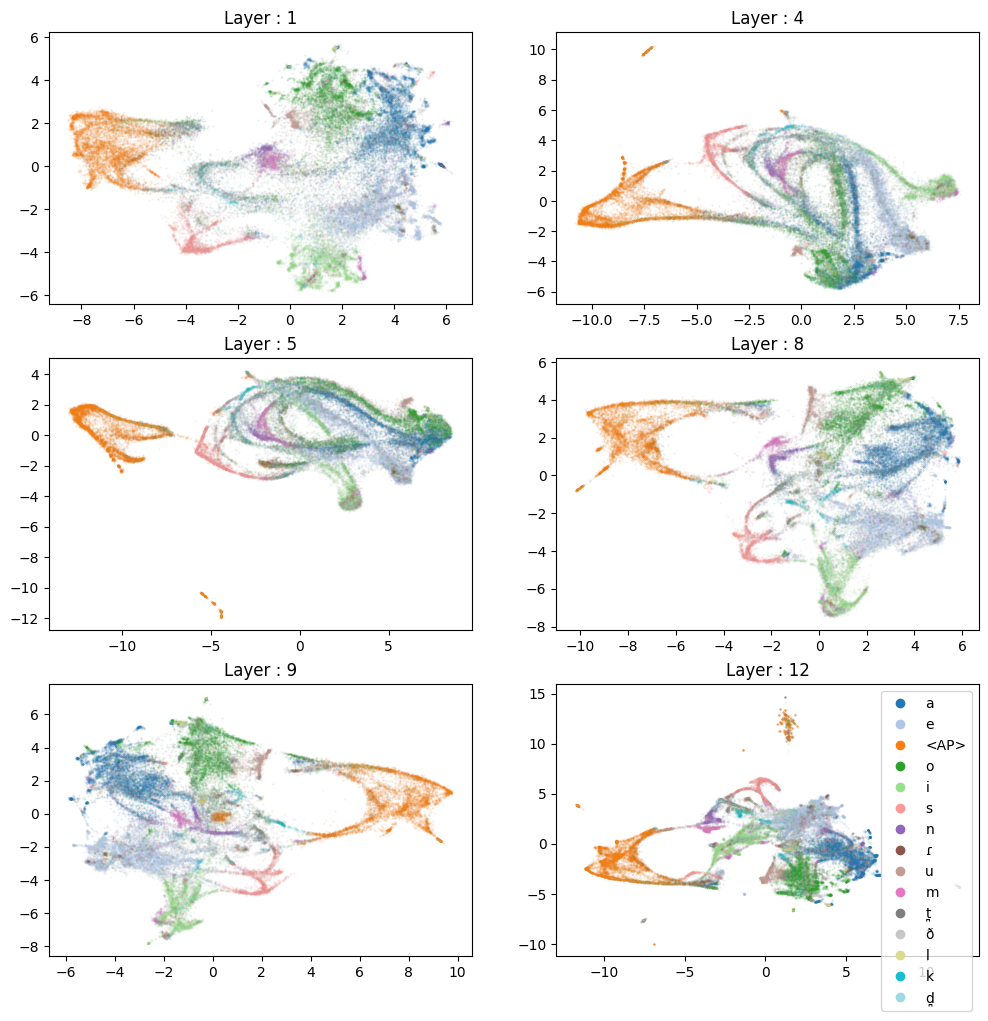

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [98]:
fig, axes = plt.subplots(3, 2, figsize = (12,12)) #, sharex=True, sharey=True)
axes = axes.flatten()

for ax, layer in zip(axes,layers):

    if layer == 12:
        add_legend = True
    else:
        add_legend = False

    feat_path = f'{experiment_path}/feat_2d_layer_{layer}.csv'
    df_anotated = pd.read_csv(feat_path, index_col=0)

    mask = df_anotated['phone_base'] != '<SP>'
    df = df_anotated[mask].copy()

    df['x'] = df['x'] - df['x'].mean()
    df['y'] = df['y'] - df['y'].mean()

    ax.set_title(f'Layer : {layer}')
    plots.make_tagged_LS_plot(df,
                    phones = unique_phones[:15],
                    figsize = (10, 6),
                    alpha = 0.1, 
                    s = 0.3, 
                    show_global = True,
                    add_legend = add_legend,
                    label_detail = True,
                    save_fig = False,
                    ax = ax);
    
plt.tight_layout();